In [ ]:
import pandas as ps

In [ ]:
df = ps.read_csv("weatherdata.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['Outlook'] = enc.fit_transform(df['Outlook'])
df['Temperature'] = enc.fit_transform(df['Temperature'])
df['Humidity'] = enc.fit_transform(df['Humidity'])
df['Wind'] = enc.fit_transform(df['Wind'])
df['Answer'] = enc.fit_transform(df['Answer'])
df.head()

,Outlook,Temperature,Humidity,Wind,Answer
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('Answer',axis='columns')
y = df.Answer
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)
x_train_list = x_train.values.tolist()
x_test_list = x_test.values.tolist()
y_train_list = y_train.values.tolist()
y_test_list = y_test.values.tolist()

In [ ]:
import numpy as np

class KNN:
    def __init__(self,k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = []
            for x_train in self.X_train:
                distance = np.sqrt(np.sum(np.square(np.array(x_train) - np.array(x))))
                distances.append(distance)

            # Get indices of k nearest neighbors
            nearest_indices = np.argsort(distances)[:self.k]

            # Get labels of k nearest neighbors
            nearest_labels = [self.y_train[i] for i in nearest_indices]

            # Predict the label based on majority vote
            prediction = max(set(nearest_labels), key=nearest_labels.count)
            predictions.append(prediction)

        return predictions
def calculate_accuracy(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    return correct / len(y_true)

def confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(y_true)
    num_classes = len(unique_labels)
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    label_to_index = {label: i for i, label in enumerate(unique_labels)}

    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        matrix[true_index, pred_index] += 1

    return matrix


# Create and train KNN classifier
k = int(input("Enter K Value: "))
clf = KNN(k)
clf.fit(x_train_list, y_train_list)
# Predict
predictions = clf.predict(x_test_list)

accuracy = calculate_accuracy(y_test_list,predictions)
matrix = confusion_matrix(y_test_list,predictions)
print("Predictions:", predictions)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(matrix)

Predictions: [0, 1, 0, 0, 1, 0, 0]
Accuracy:  0.42857142857142855
Confusion Matrix: 
[[1 0]
 [4 2]]


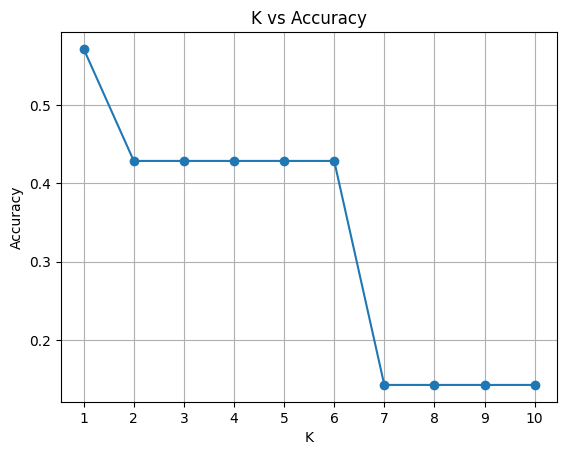

In [ ]:
from matplotlib import pyplot as plt
max_k =10
k_values = range(1, max_k + 1)
accuracies = []
for k in range(1, max_k + 1):
    clf = KNN(k=k)
    clf.fit(x_train_list, y_train_list)
    predictions = clf.predict(x_test_list)
    accuracy = calculate_accuracy(y_test_list, predictions)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]
print("Maximum accuracy:", max_accuracy)
print("Optimal value of k for maximum accuracy:", optimal_k)

Maximum accuracy: 0.5714285714285714
Optimal value of k for maximum accuracy: 1
